# Bài tập colab: Data discovery

Thành viên nhóm:

- Lê Trần Trọng Khiêm - 19521689
- Trần Tiến Hưng - 19521587
- Lê Đặng Đăng Huy - 19521612

# Download dữ liệu từ Google Drive

In [ ]:
!gdown --id 1OP3vs6PYcC9Of0LTBakOmwLnXO4NEtF2

Downloading...
From: https://drive.google.com/uc?id=1OP3vs6PYcC9Of0LTBakOmwLnXO4NEtF2
To: /content/score_training.csv
100% 23.9k/23.9k [00:00<00:00, 43.1MB/s]


In [ ]:
!gdown --id 1Zwvd4V1p63PTX3G1fwr0jyGkT8pXZHRO

Downloading...
From: https://drive.google.com/uc?id=1Zwvd4V1p63PTX3G1fwr0jyGkT8pXZHRO
To: /content/wecode.csv
30.8MB [00:00, 97.9MB/s]


# Load dữ liệu

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
wecode = pd.read_csv('wecode.csv', encoding='utf8')
score = pd.read_csv('score_training.csv', encoding='utf8')

# Phân tích dữ liệu

## Wecode

In [ ]:
wecode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264606 entries, 0 to 264605
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             264606 non-null  int64 
 1   assignment_id  264606 non-null  int64 
 2   problem_id     264606 non-null  int64 
 3   user_id        264606 non-null  int64 
 4   is_final       264606 non-null  int64 
 5   status         264605 non-null  object
 6   pre_score      264606 non-null  int64 
 7   coefficient    264606 non-null  object
 8   file_name      264606 non-null  object
 9   language_id    264606 non-null  int64 
 10  created_at     264606 non-null  object
 11  updated_at     264606 non-null  object
dtypes: int64(7), object(5)
memory usage: 24.2+ MB


In [ ]:
wecode.head()

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07


In [ ]:
no_assignment = len(wecode.assignment_id.unique())
print(f"Tổng số assignment: {no_assignment}")

Tổng số assignment: 290


In [ ]:
no_problem = len(wecode.problem_id.unique())
print(f"Tổng số problem: {no_problem}")

Tổng số problem: 634


In [ ]:
print(f"Số problem trung bình cho mỗi assignment: {no_problem / no_assignment}")

Số problem trung bình cho mỗi assignment: 2.1862068965517243


In [ ]:
no_user = len(wecode.user_id.unique())
print(f"Số user tham gia làm bài: {no_user}")

Số user tham gia làm bài: 1159


In [ ]:
print(f"Số lần nộp bài trung bình của mỗi user: {wecode.id.count() / no_user}")

Số lần nộp bài trung bình của mỗi user: 228.30543572044866


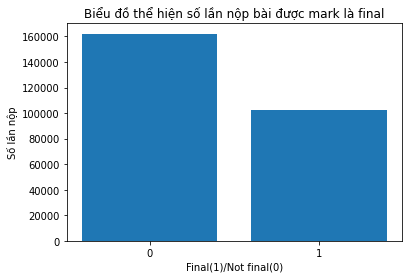

In [ ]:
tmp = wecode.is_final.value_counts()
plt.title("Biểu đồ thể hiện số lần nộp bài được mark là final")
plt.xlabel('Final(1)/Not final(0)')
plt.ylabel('Số lần nộp')
plt.bar(tmp.index, tmp)
plt.xticks(tmp.index)
plt.show()

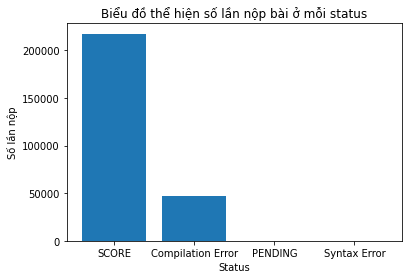

In [ ]:
tmp = wecode.status.value_counts()
plt.title("Biểu đồ thể hiện số lần nộp bài ở mỗi status")
plt.xlabel('Status')
plt.ylabel('Số lần nộp')
plt.bar(tmp.index, tmp)
plt.show()

Có thể thấy hầu hết bài đều đã được chấm điểm, kế đến số lượt bị Compilation Error khoảng 50000 và còn lại là đang chấm và Syntax Error

In [ ]:
wecode.pre_score.describe()

count    264606.000000
mean       5596.454559
std        4393.183730
min           0.000000
25%           0.000000
50%        7000.000000
75%       10000.000000
max       10000.000000
Name: pre_score, dtype: float64

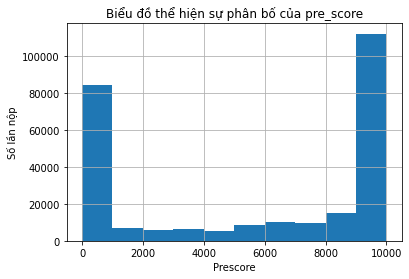

In [ ]:
plt.title("Biểu đồ thể hiện sự phân bố của pre_score")
plt.ylabel('Số lần nộp')
plt.xlabel('Prescore')
wecode.pre_score.hist()
plt.show()

Nhìn vào biểu đồ thì có thể thấy được sự phân bố của prescore nằm trong khoảng 0-1000 và từ 9000-10000.

In [ ]:
wecode.coefficient.describe()

count     264606
unique       129
top          100
freq      257952
Name: coefficient, dtype: object

Coefficient thì có đến 129 giá trị khác nhau nên mình sẽ lấy 10 giá trị xuất hiện nhiều nhất để trực quan dữ liệu.

In [ ]:
tmp = wecode.coefficient.value_counts()

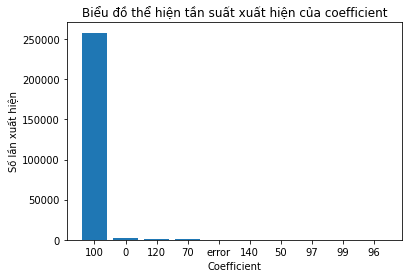

In [ ]:
plt.title('Biểu đồ thể hiện tần suất xuất hiện của coefficient')
plt.xlabel('Coefficient')
plt.ylabel('Số lần xuất hiện')
plt.bar(tmp.index[:10], tmp[:10])
plt.show()

In [ ]:
wecode.language_id.value_counts()

2    264564
4        42
Name: language_id, dtype: int64

Có thể thấy rằng hầu hết mọi người đều sử dụng ngôn ngữ có id là 2 để làm bài.

In [ ]:
print(f"Các problem được nộp từ khoảng {wecode.created_at[0]} đến {wecode.created_at.to_numpy()[-1]}")

Các problem được nộp từ khoảng 2020-10-30 10:58:11 đến 2021-05-13 17:17:17


## Score

In [ ]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      975 non-null    int64 
 1   QT      973 non-null    object
 2   GK      974 non-null    object
 3   TH      974 non-null    object
 4   CK      974 non-null    object
 5   TBM     974 non-null    object
 6   TBTL    974 non-null    object
dtypes: int64(1), object(6)
memory usage: 53.4+ KB


In [ ]:
score.head(20)

,id,QT,GK,TH,CK,TBM,TBTL
0,22,10,9,8.5,8.5,8.8,8.52
1,24,10,8,10,9.5,9.4,8.41
2,27,10,10,10,10,10,8.67
3,28,10,9.5,7.5,9.5,9.2,7.39
4,29,10,9.5,5,8.5,8.2,8.05
5,30,10,10,9,9,9.3,8.63
6,34,,,9,6.5,,6.24
7,35,7,9.5,6,4.5,6.2,5.75
8,36,4.5,8,9,7,7.6,8.51
9,37,5.5,5.5,7.5,7.5,6.9,8.27


Có thể thấy là việc đọc dữ liệu có chút vấn đề. Tuy là có giá trị trống nhưng mà khi dùng hàm info() thì nó lại không xem các giá trị này là trống. Để giải quyết vấn đề này, ta cần phải chỉ định giá trị trống đó như là giá trị null khi load data.

In [ ]:
score = pd.read_csv('score_training.csv', encoding='utf8', na_values=['\xa0'])

In [ ]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      975 non-null    int64  
 1   QT      891 non-null    float64
 2   GK      836 non-null    float64
 3   TH      892 non-null    float64
 4   CK      920 non-null    float64
 5   TBM     786 non-null    float64
 6   TBTL    972 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 53.4 KB


Như vậy thì có thể thấy rõ các giá trị null khá nhiều. Để xem các giá trị null này phân bố như thế nào.

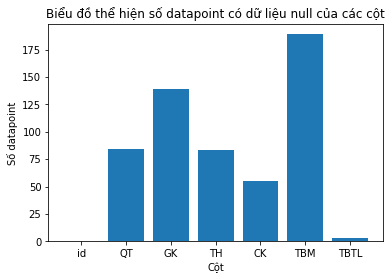

In [ ]:
tmp = score.isnull().sum()
plt.title("Biểu đồ thể hiện số datapoint có dữ liệu null của các cột")
plt.xlabel("Cột")
plt.ylabel("Số datapoint")
plt.bar(tmp.index, tmp)
plt.show()

In [ ]:
score.describe()

,id,QT,GK,TH,CK,TBM,TBTL
count,975.000000,891.000000,836.000000,892.000000,920.000000,786.000000,972.000000
mean,871.440000,7.730640,6.956340,7.297646,6.192935,6.912468,7.136831
std,506.048802,2.246309,2.154971,2.176867,2.238136,1.790099,1.483451
min,22.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000
25%,435.500000,6.500000,5.500000,6.000000,5.000000,5.900000,6.427500
50%,851.000000,8.000000,7.000000,8.000000,6.500000,7.200000,7.365000
75%,1327.500000,10.000000,8.500000,9.000000,8.000000,8.275000,8.180000
max,1866.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.880000
